In [ ]:
# Installing Dependencies
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym
!pip install yfinance
!pip install finta

     |████████████████████████████████| 411.5 MB 8.0 kB/s 
     |████████████████████████████████| 412.3 MB 29 kB/s 
     |████████████████████████████████| 240 kB 48.9 MB/s 
     |████████████████████████████████| 171 kB 68.9 MB/s 
     |████████████████████████████████| 3.8 MB 52.5 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 503 kB 72.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=601559e5ab28ecd638b2b2cb67b72ecb7f3a33e3b666a2fc60981d6dffee14a8
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [ ]:
# Importing Dependencies

import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
import yfinance as yf # Loading Google Stock Prices for 1 year.
goog = yf.Ticker('goog')
data = goog.history()
data = goog.history(start='2021-01-01', end='2022-01-01')
data.head() # Preview of the dataset.

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1901900,0,0
2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1145300,0,0
2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,2602100,0,0
2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,2265000,0,0
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,2050600,0,0


In [ ]:
df = data[["Open","High","Low","Close","Volume"]]
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date']) # Casting Date as datetime.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.sort_values('Date', ascending=True, inplace=True)
df.head() # Sorting dataframe using date.

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date,Open,High,Low,Close,Volume
0,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1901900
1,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1145300
2,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,2602100
3,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,2265000
4,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,2050600


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1901900
2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1145300
2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,2602100
2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,2265000
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,2050600


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [ ]:
env.signal_features

array([[ 1.72823999e+03,  0.00000000e+00],
       [ 1.74092004e+03,  1.26800537e+01],
       [ 1.73529004e+03, -5.63000488e+00],
       [ 1.78725000e+03,  5.19599609e+01],
       [ 1.80720996e+03,  1.99599609e+01],
       [ 1.76671997e+03, -4.04899902e+01],
       [ 1.74655005e+03, -2.01699219e+01],
       [ 1.75440002e+03,  7.84997559e+00],
       [ 1.74018005e+03, -1.42199707e+01],
       [ 1.73618994e+03, -3.99011230e+00],
       [ 1.79085999e+03,  5.46700439e+01],
       [ 1.88690002e+03,  9.60400391e+01],
       [ 1.89125000e+03,  4.34997559e+00],
       [ 1.90105005e+03,  9.80004883e+00],
       [ 1.89940002e+03, -1.65002441e+00],
       [ 1.91723999e+03,  1.78399658e+01],
       [ 1.83079004e+03, -8.64499512e+01],
       [ 1.86310999e+03,  3.23199463e+01],
       [ 1.83573999e+03, -2.73699951e+01],
       [ 1.90134998e+03,  6.56099854e+01],
       [ 1.92751001e+03,  2.61600342e+01],
       [ 2.07007007e+03,  1.42560059e+02],
       [ 2.06237012e+03, -7.69995117e+00],
       [ 2.

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 662.679931640625, 'total_profit': 0.5305628565329709, 'position': 0}


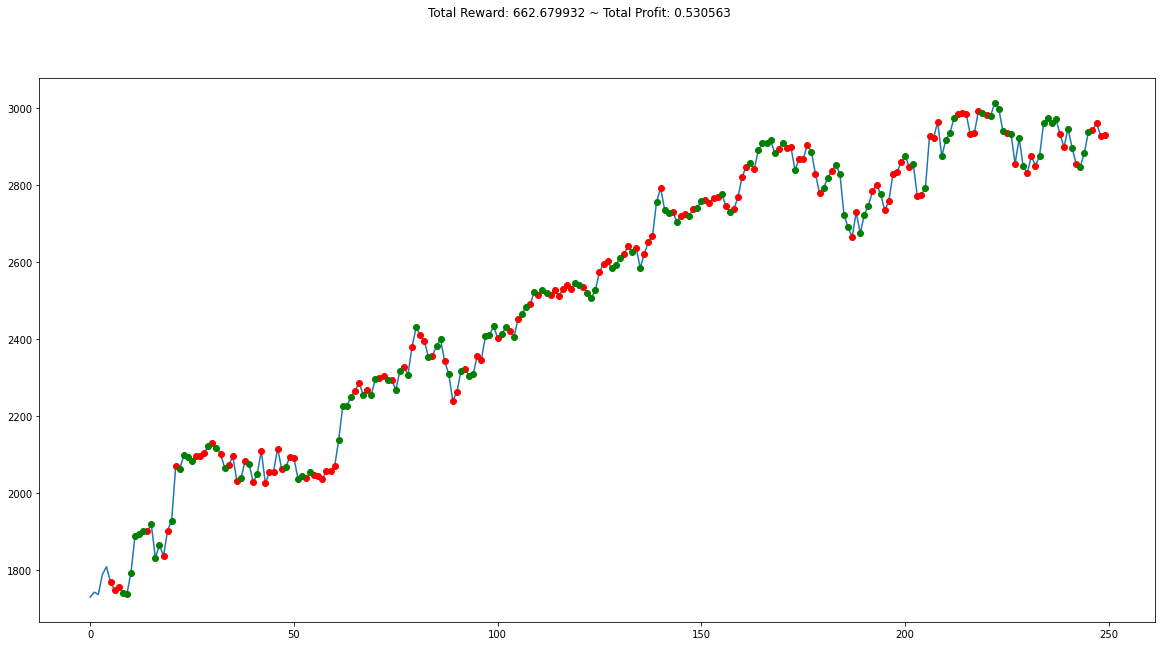

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break


plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [ ]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [ ]:
env2.signal_features

array([[ 1.70784998e+03,  1.90190000e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.71801501e+03,  1.14530000e+06,  0.00000000e+00,
         1.00000000e+02,  1.14530000e+06],
       [ 1.69900000e+03,  2.60210000e+06,  0.00000000e+00,
         6.76517195e+01, -1.45680000e+06],
       [ 1.73705005e+03,  2.26500000e+06,  0.00000000e+00,
         9.23256391e+01,  8.08200000e+05],
       [ 1.77353503e+03,  2.05060000e+06,  0.00000000e+00,
         9.41664057e+01,  2.85880000e+06],
       [ 1.76052002e+03,  1.20970000e+06,  0.00000000e+00,
         6.17890835e+01,  1.64910000e+06],
       [ 1.72531006e+03,  1.35700000e+06,  0.00000000e+00,
         5.21667587e+01,  2.92100000e+05],
       [ 1.73801001e+03,  1.09410000e+06,  0.00000000e+00,
         5.50975638e+01,  1.38620000e+06],
       [ 1.73340002e+03,  1.17950000e+06,  0.00000000e+00,
         4.92149631e+01,  2.06700000e+05],
       [ 1.72155005e+03,  1.34220000e+06,  0.00000000e+00,
         4.76767561e+01

In [ ]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.000869 |
| fps                | 3        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 5.3e+03  |
---------------------------------
---------------------------------
| explained_variance | -0.00306 |
| fps                | 140      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 12       |
---------------------------------
---------------------------------
| explained_variance | 0.00378  |
| fps                | 177     

In [ ]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 151.529296875, 'total_profit': 0.4948798525728786, 'position': 0}


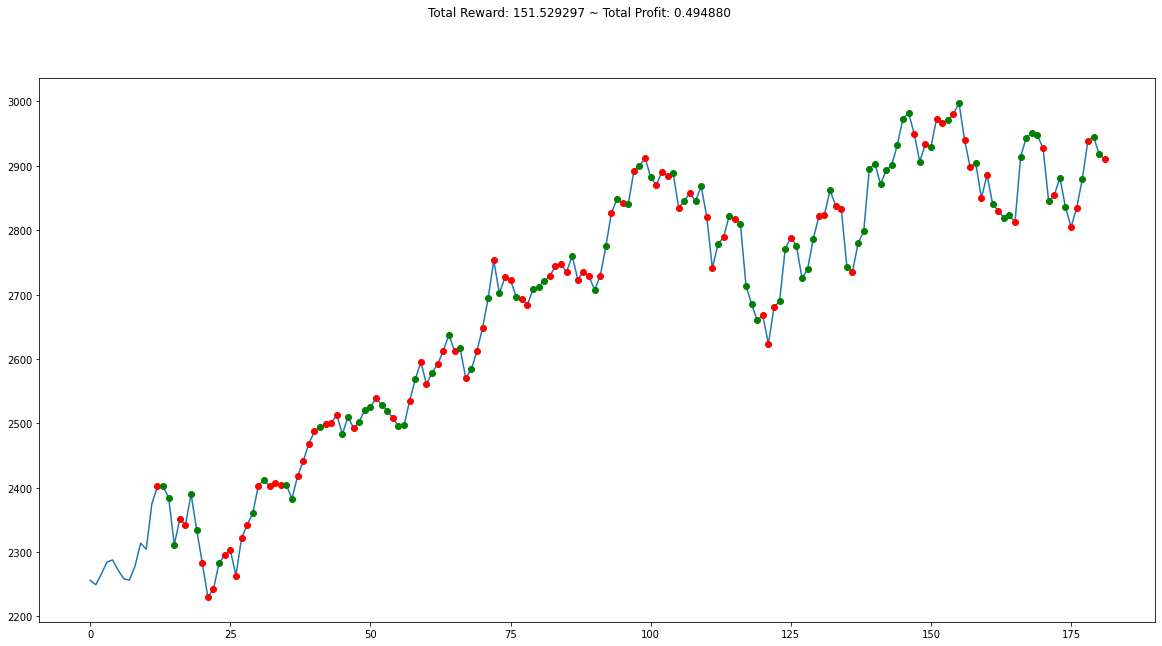

In [ ]:
plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()